# Predicting gene knockout strategies

In [1]:
from cameo import load_model, phenotypic_phase_plane

In [2]:
model = load_model('data/e_coli_core.xml.gz')

In [3]:
model.reactions.EX_o2_e.lower_bound = 0

In [4]:
model.reactions.EX_succ_e

Id,EX_succ_e
Name,Succinate exchange
Stoichiometry,succ_e -->
GPR,
Lower bound,0.000000
Upper bound,1000.000000


In [5]:
ppp = phenotypic_phase_plane(model,
                             variables=[model.reactions.BIOMASS_Ecoli_core_w_GAM],
                             objective=model.reactions.EX_succ_e)

ppp.plot()

In [6]:
mutant1 = model.copy()

In [7]:
mutant1.reactions.ACKr.knock_out()
mutant1.reactions.ATPS4r.knock_out()
mutant1.reactions.ATPM.knock_out()
mutant1.reactions.FUM.knock_out()

In [8]:
ppp = phenotypic_phase_plane(mutant1,
                             variables=[mutant1.reactions.BIOMASS_Ecoli_core_w_GAM],
                             objective=mutant1.reactions.EX_succ_e)

ppp.plot()

In [9]:
mutant2 = model.copy()

In [10]:
mutant2.reactions.ACALD.knock_out()
mutant2.reactions.PYK.knock_out()
mutant2.reactions.ME2.knock_out()

In [11]:
ppp = phenotypic_phase_plane(mutant2,
                             variables=[mutant2.reactions.BIOMASS_Ecoli_core_w_GAM],
                             objective=mutant2.reactions.EX_succ_e)

ppp.plot()

In [12]:
mutant3 = model.copy()

In [13]:
mutant3.reactions.ACALD.knock_out()
mutant3.reactions.LDH_D.knock_out()

In [14]:
ppp = phenotypic_phase_plane(mutant3,
                             variables=[mutant3.reactions.BIOMASS_Ecoli_core_w_GAM],
                             objective=mutant3.reactions.EX_succ_e)

ppp.plot()

## Excercises

* Do any of these desigs work under aerobic conditions?
* Can any of these designs actually be achieved with gene knockouts?

## Solutions

### Solution 1

### Solution 2

# Predict gene knockout strategies

In cameo we have two ways of predicting gene knockout targets: using evolutionary algorithms (OptGene) or linear programming (OptKnock)

## OptGene

OptGene is an approach to search for gene or reaction knockouts that relies on evolutionary algorithms[1]. The following image from authors summarizes the OptGene workflow.

<img src="http://static-content.springer.com/image/art%3A10.1186%2F1471-2105-6-308/MediaObjects/12859_2005_Article_632_Fig1_HTML.jpg"/>

Every iteration we keep the best 50 individuals so we can generate a library of targets.

In [24]:
from cameo.strain_design.heuristic.evolutionary_based import OptGene

In [25]:
from cameo import load_model

In [26]:
model = load_model('data/e_coli_core.xml.gz')

In [27]:
optgene = OptGene(model)

In [28]:
result = optgene.run(target=model.reactions.EX_succ_e, 
                     biomass=model.reactions.BIOMASS_Ecoli_core_w_GAM,
                     substrate=model.metabolites.glc__D_e,
                     max_evaluations=15000, population_size=200000, max_knockouts=2,
                     plot=False, growth_coupled=True)

Starting optimization at Tue, 06 Sep 2016 11:31:55


Finished after 00:02:31


In [29]:
result

,reactions,genes,size,fva_min,fva_max,target_flux,biomass_flux,yield,fitness
0,"(ATPS4r, CO2t, ACALDt, PYK, O2t)","((s0001, b3732, b1854, b1676, b2464),)",5.0,7.799546,8.216142,8.070501,0.1049,0.80705,0.08466
1,"(ATPS4r, CO2t, ACALDt, PYK, GLNabc, O2t)","((b0811, b3738, b1676, b2464, s0001, b1854),)",6.0,7.799546,8.216142,8.070501,0.1049,0.80705,0.08466
2,"(ATPS4r, CO2t, ACALDt, PYK, O2t)","((b3738, b1676, b3952, b3925, s0001, b1854), (...",6.0,7.799546,8.216142,8.070501,0.1049,0.80705,0.08466
3,"(ATPS4r, CO2t, ACALDt, PYK, O2t)","((b3738, b2975, b1676, b3733, s0001, b3732, b1...",7.0,7.799546,8.216142,8.070501,0.1049,0.80705,0.08466
...,...,...,...,...,...,...,...,...,...
20,"(ATPS4r, CO2t, ACALDt, AKGDH, PYK, O2t)","((b1849, b2935, b3738, b0727, b1676, b0903, s0...",9.0,7.799546,8.216142,8.070501,0.1049,0.80705,0.08466
21,"(ATPS4r, CO2t, ACALDt, AKGDH, PYK, GLNabc, O2t)","((b1849, b2935, b3738, b0727, b1676, b0809, b0...",9.0,7.799546,8.216142,8.070501,0.1049,0.80705,0.08466
22,"(ATPS4r, GLUt2r, CO2t, ACALDt, GLUSy, PYK, O2t)","((b2579, b3738, b1676, b4077, b0903, b2464, s0...",9.0,7.799546,8.216142,8.070501,0.1049,0.80705,0.08466
23,"(ATPS4r, SUCDi, CO2t, ACALDt, PYK, THD2, O2t)","((b0723, b1676, b1603, b0903, b1241, b4301, s0...",9.0,7.799546,8.163241,8.070501,0.1049,0.80705,0.08466


In [30]:
df = result.data_frame.sort_values('fitness')
df[df.fitness > 0.01]

,reactions,genes,size,fva_min,fva_max,target_flux,biomass_flux,yield,fitness
0,"(ATPS4r, CO2t, ACALDt, PYK, O2t)","((s0001, b3732, b1854, b1676, b2464),)",5.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
21,"(ATPS4r, CO2t, ACALDt, AKGDH, PYK, GLNabc, O2t)","((b1849, b2935, b3738, b0727, b1676, b0809, b0...",9.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
20,"(ATPS4r, CO2t, ACALDt, AKGDH, PYK, O2t)","((b1849, b2935, b3738, b0727, b1676, b0903, s0...",9.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
19,"(ATPS4r, CO2t, ACALDt, PYK, GLNabc, O2t)","((b1849, b0811, b2935, b3738, b1676, b0809, b0...",9.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
...,...,...,...,...,...,...,...,...,...
2,"(ATPS4r, CO2t, ACALDt, PYK, O2t)","((b3738, b1676, b3952, b3925, s0001, b1854), (...",6.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
1,"(ATPS4r, CO2t, ACALDt, PYK, GLNabc, O2t)","((b0811, b3738, b1676, b2464, s0001, b1854),)",6.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
22,"(ATPS4r, GLUt2r, CO2t, ACALDt, GLUSy, PYK, O2t)","((b2579, b3738, b1676, b4077, b0903, b2464, s0...",9.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
11,"(ATPS4r, ME2, SUCDi, GND, THD2)","((b2463, b3738, b2029, b2975, b1602, b4395, b4...",8.0,4.202028,4.676178,4.563765,0.266169,0.456377,0.121473


In [31]:
df = result.data_frame.sort_values('fitness')
df[df.fitness > 0.01]

,reactions,genes,size,fva_min,fva_max,target_flux,biomass_flux,yield,fitness
0,"(ATPS4r, CO2t, ACALDt, PYK, O2t)","((s0001, b3732, b1854, b1676, b2464),)",5.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
21,"(ATPS4r, CO2t, ACALDt, AKGDH, PYK, GLNabc, O2t)","((b1849, b2935, b3738, b0727, b1676, b0809, b0...",9.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
20,"(ATPS4r, CO2t, ACALDt, AKGDH, PYK, O2t)","((b1849, b2935, b3738, b0727, b1676, b0903, s0...",9.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
19,"(ATPS4r, CO2t, ACALDt, PYK, GLNabc, O2t)","((b1849, b0811, b2935, b3738, b1676, b0809, b0...",9.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
...,...,...,...,...,...,...,...,...,...
2,"(ATPS4r, CO2t, ACALDt, PYK, O2t)","((b3738, b1676, b3952, b3925, s0001, b1854), (...",6.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
1,"(ATPS4r, CO2t, ACALDt, PYK, GLNabc, O2t)","((b0811, b3738, b1676, b2464, s0001, b1854),)",6.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
22,"(ATPS4r, GLUt2r, CO2t, ACALDt, GLUSy, PYK, O2t)","((b2579, b3738, b1676, b4077, b0903, b2464, s0...",9.0,7.799546,8.216142,8.070501,0.104900,0.807050,0.084660
11,"(ATPS4r, ME2, SUCDi, GND, THD2)","((b2463, b3738, b2029, b2975, b1602, b4395, b4...",8.0,4.202028,4.676178,4.563765,0.266169,0.456377,0.121473


In [32]:
result.plot(8)

In [33]:
result.display_on_map(8, "e_coli_core.Core metabolism")

## OptKnock

OptKnock uses a bi-level mixed integer linear programming approach to identify reaction knockouts[2]:

$$
\begin{matrix}
maximize & \mathit{v_{chemical}} & & (\mathbf{OptKnock}) \\
\mathit{y_j} & & & \\
subject~to & maximize & \mathit{v_{biomass}} & (\mathbf{Primal}) \\
& \mathit{v_j} & & & & \\
\end{matrix}\\
\begin{bmatrix}
subject~to  & \sum_{j=1}^{M}S_{ij}v_{j} = 0,\\ 
& v_{carbon\_uptake} = v_{carbon~target}\\ 
& v_{apt} \ge v_{apt\_main}\\ 
& v_{biomass} \ge v_{target\_biomass}\\ 
& v_{j}^{min} \cdot y_j \le v_j \le v_{j}^{max} \cdot y_j, \forall j \in \boldsymbol{M} \\
\end{bmatrix}\\
\begin{align}
 & y_j = {0, 1}, & & \forall j \in \boldsymbol{M} & \\
 & \sum_{j \in M} (1 - y_j) \le K& & & \\
\end{align}
$$



In [34]:
from cameo.strain_design.deterministic.linear_programming import OptKnock

In [35]:
optknock = OptKnock(model, fraction_of_optimum=0.1)

Running multiple knockouts with OptKnock can take a few hours or days...


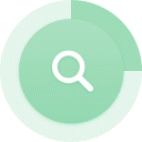

<IPython.core.display.Javascript object>

In [36]:
result = optknock.run(max_knockouts=1, target="EX_ac_e", biomass="BIOMASS_Ecoli_core_w_GAM")

In [37]:
result

,reactions,size,EX_ac_e,biomass,fva_min,fva_max
0,{ATPS4r},1.0,14.312267,0.37423,0.0,14.369145


In [38]:
result.plot(0)

In [39]:
result.display_on_map(0, "e_coli_core.Core metabolism")

## References

[1]Patil, K. R., Rocha, I., Förster, J., & Nielsen, J. (2005). Evolutionary programming as a platform for in silico metabolic engineering. BMC Bioinformatics, 6, 308. doi:10.1186/1471-2105-6-308

[2]Burgard, A.P., Pharkya, P., Maranas, C.D. (2003), "OptKnock: A Bilevel Programming Framework for Identifying Gene Knockout Strategies for Microbial Strain Optimization," Biotechnology and Bioengineering, 84(6), 647-657.

## Exercises

* Use OptGene or OptKnock to find a growth coupled design for a product of your choice!